## Датасет - Music Genre Classification

## Описание задачи  
По приведенным характеристикам определить жанр музыки к которому принадлежит песня.

In [62]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
from sklearn.metrics import accuracy_score
import tqdm

In [63]:
url_train = r"F:/Downloads/Music Genre/train.csv"

data = pd.read_csv(url_train)

In [64]:
data.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

In [65]:
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [66]:
data.tail()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.99300,0.824000,0.0984,0.177,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.85800,0.000016,0.0705,0.335,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.00003,0.000136,0.6660,0.262,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.00129,0.916000,0.2560,0.355,131.363,219693.0,4,8
17995,The Raconteurs,Broken Boy Soldier,43.0,0.400,0.853,4.0,-5.320,0,0.0591,0.00604,0.212000,0.3340,0.377,138.102,182227.0,4,10


Столбцы (признаки) имеют имена:

- artist name - имя артиста
- track name - название песни
- popularity - популярность
- danceability - коэффициент "танцевальности"
- energy - энергичность
- key 
- loudness - громкость
- mode
- speechiness -  бессловесность
- acousticness - акустичность
- instrumentalness - инструменатльность
- liveness 
- valence  Описывает музыкальную позитивность
- tempo - темп песни
- duration in -milliseconds  - длительность
- time_signature - размер такта
- Class - класс музыки 

Требуется предсказать категориальный признак Class по остальным признакам. Это задача классификации.
Классы: Rock - 10 , Indie - 6 , Pop - 9, Metal - 8, HipHop - 5, Alt_Music - 1 , Blues - 2 , Acoustic/Folk - 0 , Instrumental-7 , Country - 4 , Bollywood - 3

In [67]:
data[data['Class'] == 1]

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
21,Clairmont The Second,intres-ting,44.0,0.796,0.4410,7.0,-9.830,1,0.2920,0.16000,0.000029,0.1180,0.371,158.105,137872.0,4,1
27,duendita,Open Eyes,35.0,0.341,0.4700,5.0,-10.144,1,0.0370,0.22600,0.105000,0.5180,0.203,144.109,204280.0,4,1
35,Brandon Jack & The Artifacts,four days,29.0,0.516,0.9480,2.0,-3.994,1,0.0644,0.02790,0.056400,0.1500,0.957,170.087,130329.0,4,1
53,Veruca Salt,Seether,47.0,0.612,0.8600,8.0,-9.175,1,0.0440,0.00253,0.001530,0.1580,0.687,136.212,196467.0,4,1
59,Nick Cave & The Bad Seeds,Deanna,41.0,0.415,0.9400,NaN,-4.874,1,0.0889,0.00490,NaN,0.1440,0.439,134.392,225627.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17926,ceo@business.net,buttercup 2,50.0,0.798,0.5190,5.0,-7.380,0,0.0622,0.37500,0.000652,0.1310,0.521,116.046,136500.0,4,1
17933,The Clash,London Calling - Remastered,73.0,0.651,0.8010,NaN,-7.340,1,0.0514,0.12300,NaN,0.0825,0.776,133.769,200480.0,4,1
17947,Repenter,Forever,21.0,0.378,0.7640,11.0,-10.469,1,0.0857,0.02110,0.226000,0.3550,0.354,149.385,250867.0,4,1
17987,Jilted John,Jilted John - Single Version,42.0,0.351,0.8830,NaN,-6.952,1,0.0562,0.03630,NaN,0.4990,0.880,195.666,175400.0,4,1


In [68]:
data['Popularity'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     2.000
0.010     4.000
0.050    16.000
0.100    23.000
0.500    44.000
0.900    68.000
0.950    74.650
0.990    84.000
0.995    87.165
Name: Popularity, dtype: float64

In [69]:
data.isna().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [70]:
data = data.dropna()
data.isna().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

Поменяем задачу будет пытаться определить относится ли музыка категории РОК / МЕТАЛ или любая другая. Сведем задачу к бинарной классификации

In [71]:
#data['Class'].value_counts()

In [72]:
y = data["Class"]
data = data.drop(["Class"], axis=1)

# Нормализация количественных признаков

Выполним стандартизацию всех признаков (линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению): Выбираем имеено этот вариант нормализации, так как в дальнейшем будем использовать алгоритм k ближайших соседей, основанный на измерении расстояний.

In [73]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data = pd.concat((data_stand,y),axis = 1)

In [74]:
data.describe()

,Popularity,acousticness,danceability,duration_in min/ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Class
count,1.181300e+04,1.181300e+04,1.181300e+04,1.181300e+04,1.181300e+04,1.181300e+04,1.181300e+04,1.181300e+04,1.181300e+04,1.181300e+04,1.181300e+04,1.181300e+04,1.181300e+04,1.181300e+04,11813.000000
mean,1.153665e-16,-1.049501e-15,-1.080767e-14,1.553828e-15,-1.252839e-14,7.439119e-17,1.871393e-16,-5.009979e-15,-2.062639e-15,4.545025e-17,-1.373242e-15,-4.178632e-15,7.892283e-16,-4.922692e-15,6.622619
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.246656
min,-2.541006e+00,-7.519165e-01,-2.774152e+00,-1.838005e+00,-2.766068e+00,-5.891537e-01,-1.569948e+00,-1.146816e+00,-6.603843e+00,-1.288118e+00,-7.170990e-01,-3.138596e+00,-7.635305e+00,-1.846898e+00,0.000000
25%,-6.699853e-01,-7.459944e-01,-6.743106e-01,-3.229143e-01,-6.491510e-01,-5.888407e-01,-9.385051e-01,-6.147117e-01,-4.194167e-01,-1.288118e+00,-5.385883e-01,-7.790334e-01,2.258139e-01,-8.139285e-01,5.000000
50%,-6.643039e-02,-5.761328e-01,1.238459e-02,4.262537e-02,1.885704e-01,-5.750363e-01,8.659423e-03,-4.262842e-01,2.127062e-01,7.762609e-01,-3.659787e-01,-9.794613e-02,2.258139e-01,-3.317203e-02,8.000000
75%,6.578356e-01,5.672445e-01,6.810089e-01,4.371147e-01,8.447167e-01,9.877440e-02,9.558239e-01,3.812627e-01,6.780714e-01,7.762609e-01,7.956055e-02,6.438257e-01,2.258139e-01,7.761985e-01,10.000000
max,3.313477e+00,2.368949e+00,2.795307e+00,1.091218e+01,1.360555e+00,2.689215e+00,1.587267e+00,4.988661e+00,2.257435e+00,7.762609e-01,1.274497e+01,3.210483e+00,2.846187e+00,2.084272e+00,10.000000


# Отбор признаков

Для предсказания жанра музыки будедет использовать все признаки кроме Artist Name и Track Name

In [75]:
X = data.drop(['Class',"Artist Name","Track Name"],axis=1)
y = data["Class"]
X = X.to_numpy()
y = y.to_numpy()

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 45)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

8859 2954


In [77]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (20,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          max_iter=200000,
                          random_state = 42,
                          verbose=10)

In [78]:
%%time
mlp_model.fit(X_train, y_train)

Wall time: 1min 42s


MLPClassifier(activation='logistic', hidden_layer_sizes=(20,), max_iter=200000,
              random_state=42, solver='lbfgs', verbose=10)

# Ошибка на тестовой выборке

In [79]:
y_train_predict = mlp_model.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)
err_train

0.45546901456146294

In [80]:
y_test_predict = mlp_model.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.4969532836831415

Ошибка на выборках немного меньше чем ошибка в методе k - ближайших соседей, однако результат все так же неудовлетворительный

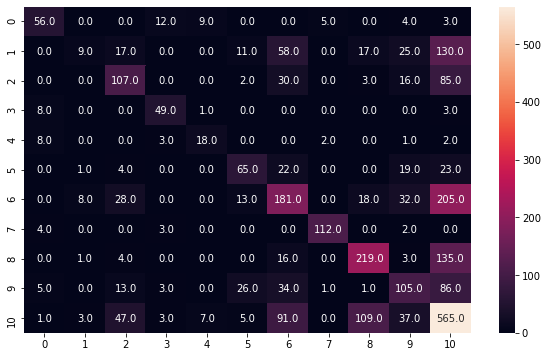

In [81]:
from sklearn.metrics import confusion_matrix, f1_score
plt.figure(figsize=(10,6))
x=sns.heatmap(confusion_matrix(y_test, y_test_predict),annot=True, fmt='0.1f')
plt.show()

Поменяем задачу будет пытаться определить относится ли музыка категории РОК / МЕТАЛ / АЛЬТЕРНАТИВ или любая другая. Сведем задачу к бинарной классификации

In [82]:
data['Class'] = data['Class'].apply(lambda x: 1 if x == 8 or x== 10 or x == 1 else 0)

# Обучение полносвязной нейронной сети
## 1 скрытый слой

In [83]:
X = data.drop(['Class',"Artist Name","Track Name"],axis=1)
y = data["Class"]
X = X.to_numpy()
y = y.to_numpy()

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 45)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test,y)

8859 2954 [1 0 1 ... 1 1 1]


In [85]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (50,),
                          solver = 'adam', 
                          activation = 'logistic',
                          max_iter=2000,
                          random_state = 42,
                          verbose=1)

In [87]:
%%time
mlp_model.fit(X_train, y_train)

Iteration 1, loss = 0.66781808
Iteration 2, loss = 0.62013727
Iteration 3, loss = 0.58447786
Iteration 4, loss = 0.56072888
Iteration 5, loss = 0.54730952
Iteration 6, loss = 0.53999777
Iteration 7, loss = 0.53678455
Iteration 8, loss = 0.53356688
Iteration 9, loss = 0.53192143
Iteration 10, loss = 0.53080581
Iteration 11, loss = 0.53022421
Iteration 12, loss = 0.52949915
Iteration 13, loss = 0.52883683
Iteration 14, loss = 0.52840219
Iteration 15, loss = 0.52816885
Iteration 16, loss = 0.52777709
Iteration 17, loss = 0.52763596
Iteration 18, loss = 0.52756182
Iteration 19, loss = 0.52717815
Iteration 20, loss = 0.52710576
Iteration 21, loss = 0.52703921
Iteration 22, loss = 0.52700663
Iteration 23, loss = 0.52690200
Iteration 24, loss = 0.52688829
Iteration 25, loss = 0.52674411
Iteration 26, loss = 0.52689932
Iteration 27, loss = 0.52638541
Iteration 28, loss = 0.52626702
Iteration 29, loss = 0.52632045
Iteration 30, loss = 0.52610580
Iteration 31, loss = 0.52616946
Iteration 32, los

Iteration 253, loss = 0.48442774
Iteration 254, loss = 0.48379148
Iteration 255, loss = 0.48415328
Iteration 256, loss = 0.48366227
Iteration 257, loss = 0.48358170
Iteration 258, loss = 0.48309215
Iteration 259, loss = 0.48306952
Iteration 260, loss = 0.48288066
Iteration 261, loss = 0.48269132
Iteration 262, loss = 0.48246297
Iteration 263, loss = 0.48224559
Iteration 264, loss = 0.48226942
Iteration 265, loss = 0.48231120
Iteration 266, loss = 0.48179664
Iteration 267, loss = 0.48178219
Iteration 268, loss = 0.48184586
Iteration 269, loss = 0.48142025
Iteration 270, loss = 0.48122828
Iteration 271, loss = 0.48122530
Iteration 272, loss = 0.48099014
Iteration 273, loss = 0.48089164
Iteration 274, loss = 0.48076861
Iteration 275, loss = 0.48062037
Iteration 276, loss = 0.48057483
Iteration 277, loss = 0.48024788
Iteration 278, loss = 0.48017919
Iteration 279, loss = 0.47984880
Iteration 280, loss = 0.47988864
Iteration 281, loss = 0.47975748
Iteration 282, loss = 0.47979144
Iteration 

Iteration 502, loss = 0.45649053
Iteration 503, loss = 0.45694690
Iteration 504, loss = 0.45682813
Iteration 505, loss = 0.45647908
Iteration 506, loss = 0.45638923
Iteration 507, loss = 0.45658521
Iteration 508, loss = 0.45668534
Iteration 509, loss = 0.45645374
Iteration 510, loss = 0.45626654
Iteration 511, loss = 0.45591130
Iteration 512, loss = 0.45597422
Iteration 513, loss = 0.45584000
Iteration 514, loss = 0.45570709
Iteration 515, loss = 0.45575306
Iteration 516, loss = 0.45547710
Iteration 517, loss = 0.45547906
Iteration 518, loss = 0.45566349
Iteration 519, loss = 0.45520780
Iteration 520, loss = 0.45510310
Iteration 521, loss = 0.45519488
Iteration 522, loss = 0.45517277
Iteration 523, loss = 0.45510510
Iteration 524, loss = 0.45476767
Iteration 525, loss = 0.45463062
Iteration 526, loss = 0.45467820
Iteration 527, loss = 0.45459038
Iteration 528, loss = 0.45444032
Iteration 529, loss = 0.45441723
Iteration 530, loss = 0.45430050
Iteration 531, loss = 0.45426948
Iteration 

Iteration 754, loss = 0.43584358
Iteration 755, loss = 0.43619413
Iteration 756, loss = 0.43590909
Iteration 757, loss = 0.43574209
Iteration 758, loss = 0.43562677
Iteration 759, loss = 0.43560350
Iteration 760, loss = 0.43539191
Iteration 761, loss = 0.43534185
Iteration 762, loss = 0.43520302
Iteration 763, loss = 0.43549615
Iteration 764, loss = 0.43554443
Iteration 765, loss = 0.43528489
Iteration 766, loss = 0.43505048
Iteration 767, loss = 0.43491505
Iteration 768, loss = 0.43479580
Iteration 769, loss = 0.43485382
Iteration 770, loss = 0.43479878
Iteration 771, loss = 0.43470859
Iteration 772, loss = 0.43466708
Iteration 773, loss = 0.43459331
Iteration 774, loss = 0.43462155
Iteration 775, loss = 0.43447834
Iteration 776, loss = 0.43435832
Iteration 777, loss = 0.43434489
Iteration 778, loss = 0.43438395
Iteration 779, loss = 0.43435993
Iteration 780, loss = 0.43420057
Iteration 781, loss = 0.43392759
Iteration 782, loss = 0.43374734
Iteration 783, loss = 0.43386727
Iteration 

MLPClassifier(activation='logistic', hidden_layer_sizes=(50,), max_iter=2000,
              random_state=42, verbose=1)

# Ошибка на тренировочной выборке

In [88]:
y_train_predict = mlp_model.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)
err_train

0.20939157918500959

# Ошибка на тестовой выборке

In [89]:
y_test_predict = mlp_model.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.2593094109681787

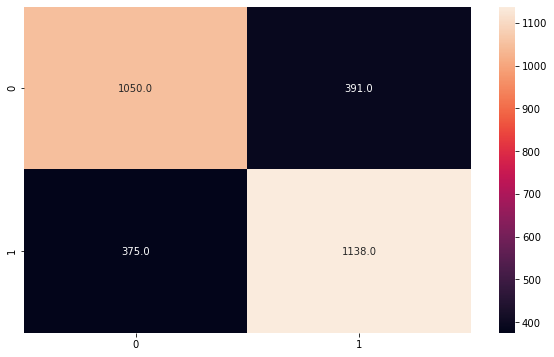

In [90]:
from sklearn.metrics import confusion_matrix, f1_score
plt.figure(figsize=(10,6))
x=sns.heatmap(confusion_matrix(y_test, y_test_predict),annot=True, fmt='0.1f')
plt.show()

In [91]:
f1_score(y_test, y_test_predict)

0.7481919789612096

# Подбор параметра alpha

In [92]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in tqdm.tqdm_notebook(alpha_arr):
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (30,), 
                              solver = 'adam', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

<ipython-input-92-9b512663ed09>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for alpha in tqdm.tqdm_notebook(alpha_arr):


  0%|          | 0/21 [00:00<?, ?it/s]

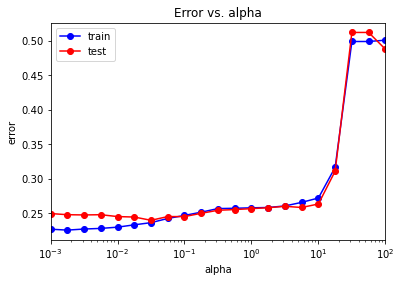

In [93]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

Найдем минимальное значение ошибки

In [94]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.2250818376791963 0.23933649289099526


Теперь оптимальное alpha

In [95]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.03162278]


Классификатор при найденном оптимальном значении alpha:

In [96]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (30,),
                          solver = 'adam', activation = 'logistic', random_state = 42,max_iter=1000)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.2359182752003612
0.23933649289099526


# Подберем оптимальное количество нейронов на скрытом слое

In [97]:
from sklearn.metrics import accuracy_score
import tqdm
neurons = np.arange(2,100,1,dtype = int)
test_err = []
train_err = []
train_acc = []
test_acc = []

for neurons_count in tqdm.tqdm_notebook(neurons):
    mlp_model = MLPClassifier(alpha=alpha_opt,hidden_layer_sizes = (neurons_count,), solver = 'adam',  activation = 'logistic',
                              max_iter=2000,random_state = 42,tol=1e-3)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

<ipython-input-97-28e86d6633bf>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for neurons_count in tqdm.tqdm_notebook(neurons):


  0%|          | 0/98 [00:00<?, ?it/s]

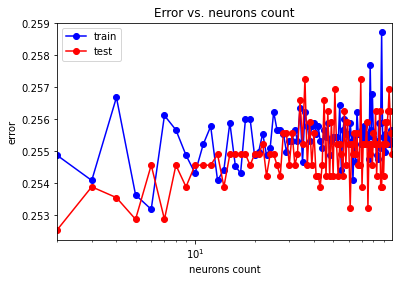

In [98]:
plt.semilogx(neurons, train_err, 'b-o', label = 'train')
plt.semilogx(neurons, test_err, 'r-o', label = 'test')
plt.xlim([np.min(neurons), np.max(neurons)])
plt.title('Error vs. neurons count')
plt.xlabel('neurons count')
plt.ylabel('error')
plt.legend()

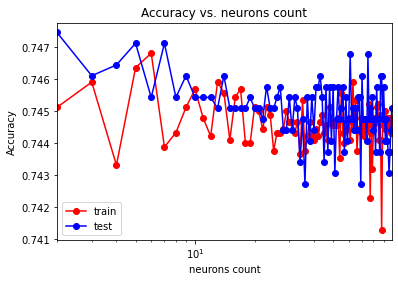

In [99]:
plt.semilogx(neurons, train_acc, 'r-o', label = 'train')
plt.semilogx(neurons, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(neurons), np.max(neurons)])
plt.title('Accuracy vs. neurons count')
plt.xlabel('neurons count')
plt.ylabel('Accuracy')
plt.legend()

In [100]:
indexMax = np.argmax(test_acc)


# Построим нейросеть с оптимальынми параметрами

In [101]:
mlp_model = MLPClassifier(alpha=alpha_opt,hidden_layer_sizes =neurons[indexMax] , solver = 'adam',  activation = 'logistic',
                          max_iter=2000,random_state = 42,tol=1e-3)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

train_err.append(np.mean(y_train != y_train_pred))
test_err.append(np.mean(y_test != y_test_pred))
train_acc.append(accuracy_score(y_train, y_train_pred))
test_acc.append(accuracy_score(y_test, y_test_pred))

# Ошибка на тестовой выборке


In [102]:
y_test_predict = mlp_model.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.2525389302640487

# Ошибка на тренировочной выборке

In [103]:
y_train_predict = mlp_model.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)
err_train

0.2548820408623998

In [104]:
from sklearn.metrics import plot_confusion_matrix

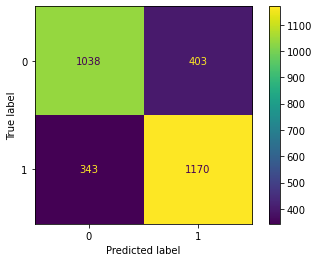

In [105]:
plot_confusion_matrix(mlp_model, X_test, y_test) 

# Другие  метрики качества

In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1441
           1       0.74      0.77      0.76      1513

    accuracy                           0.75      2954
   macro avg       0.75      0.75      0.75      2954
weighted avg       0.75      0.75      0.75      2954



## Вывод: 
была произведена попытка построения нейросети для решения поставленной задачи. Результат оказался немного лучше, но даже после приведения задачи к бинарной классификации оставляет желать лучшего